Diabetes Prediction Dataset
i got this dataset from kaggle from the user : " Marshal Patel3558 " 
ABOUT THE DATASET :
The provided dataset appears to be related to diabetes and contains various biomedical measurements and patient characteristics. Here's a detailed description of the dataset columns:

ID: A unique identifier for each record in the dataset.
No_Pation: Another identifier for the patient. It might be a patient number or record ID.
Gender: The gender of the patient (F for Female, M for Male).
AGE: The age of the patient in years.
Urea: Urea level in the blood (likely measured in mg/dL or mmol/L). Urea is a waste product of protein metabolism and can indicate kidney function.
Cr: Creatinine level in the blood (likely measured in mg/dL or µmol/L). Creatinine is another waste product that indicates kidney function.
HbA1c: Glycated hemoglobin, a measure of average blood sugar levels over the past 2-3 months (expressed as a percentage).
Chol: Cholesterol level in the blood (likely measured in mg/dL or mmol/L). This typically refers to total cholesterol.
TG: Triglycerides level in the blood (likely measured in mg/dL or mmol/L). Triglycerides are a type of fat in the blood.
HDL: High-density lipoprotein cholesterol level (often called "good" cholesterol, measured in mg/dL or mmol/L).
LDL: Low-density lipoprotein cholesterol level (often called "bad" cholesterol, measured in mg/dL or mmol/L).
VLDL: Very low-density lipoprotein cholesterol level (measured in mg/dL or mmol/L).
BMI: Body Mass Index, a measure of body fat based on height and weight (calculated as weight in kilograms divided by height in meters squared).
CLASS: The class label indicating the diabetes status of the patient. The possible values seem to be:
N: Non-diabetic
P: Prediabetic
Y: Diabetic

GETTING READY WITH NECESSARY MODULES 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


LOADING THE DATAFRAME

In [5]:
dataframe=pd.read_csv("Dataset of Diabetes .csv")
print(dataframe.shape)
print(dataframe.columns)
dataframe.sample(5)
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataframe["Gender"]=dataframe["Gender"].astype(str).str.upper()
dataframe["Gender"]=encoder.fit_transform(dataframe["Gender"])
print(encoder.classes_)



(1000, 14)
Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')
['F' 'M']


CHECKING FOR FEATURE ENGINEERING AND MISSING AND REPEATED VALUES

In [6]:
print(dataframe.isnull().sum())
print("The dataset is clean")
print(dataframe.info())
print(dataframe.describe())
dataframe["CLASS"]=dataframe["CLASS"].astype(str).str.strip()
encoder_target=LabelEncoder()
dataframe["CLASS"]=encoder.fit_transform(dataframe["CLASS"])
print(encoder.classes_)
dataframe["AGEbin"]=pd.cut(dataframe["AGE"],bins=[0,25,50,80,100],labels=False)

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64
The dataset is clean
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   int32  
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: fl

DATA STATISTICS AND VISUALISATION

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS', 'AGEbin'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   int32  
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   int32  
 14  AGEbin     1000 non-null   int64  
dtypes: float64(8), int32(2), int64(5)
memory usage: 109

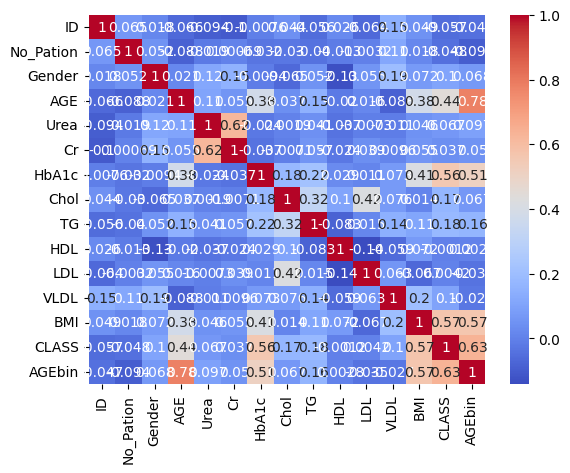

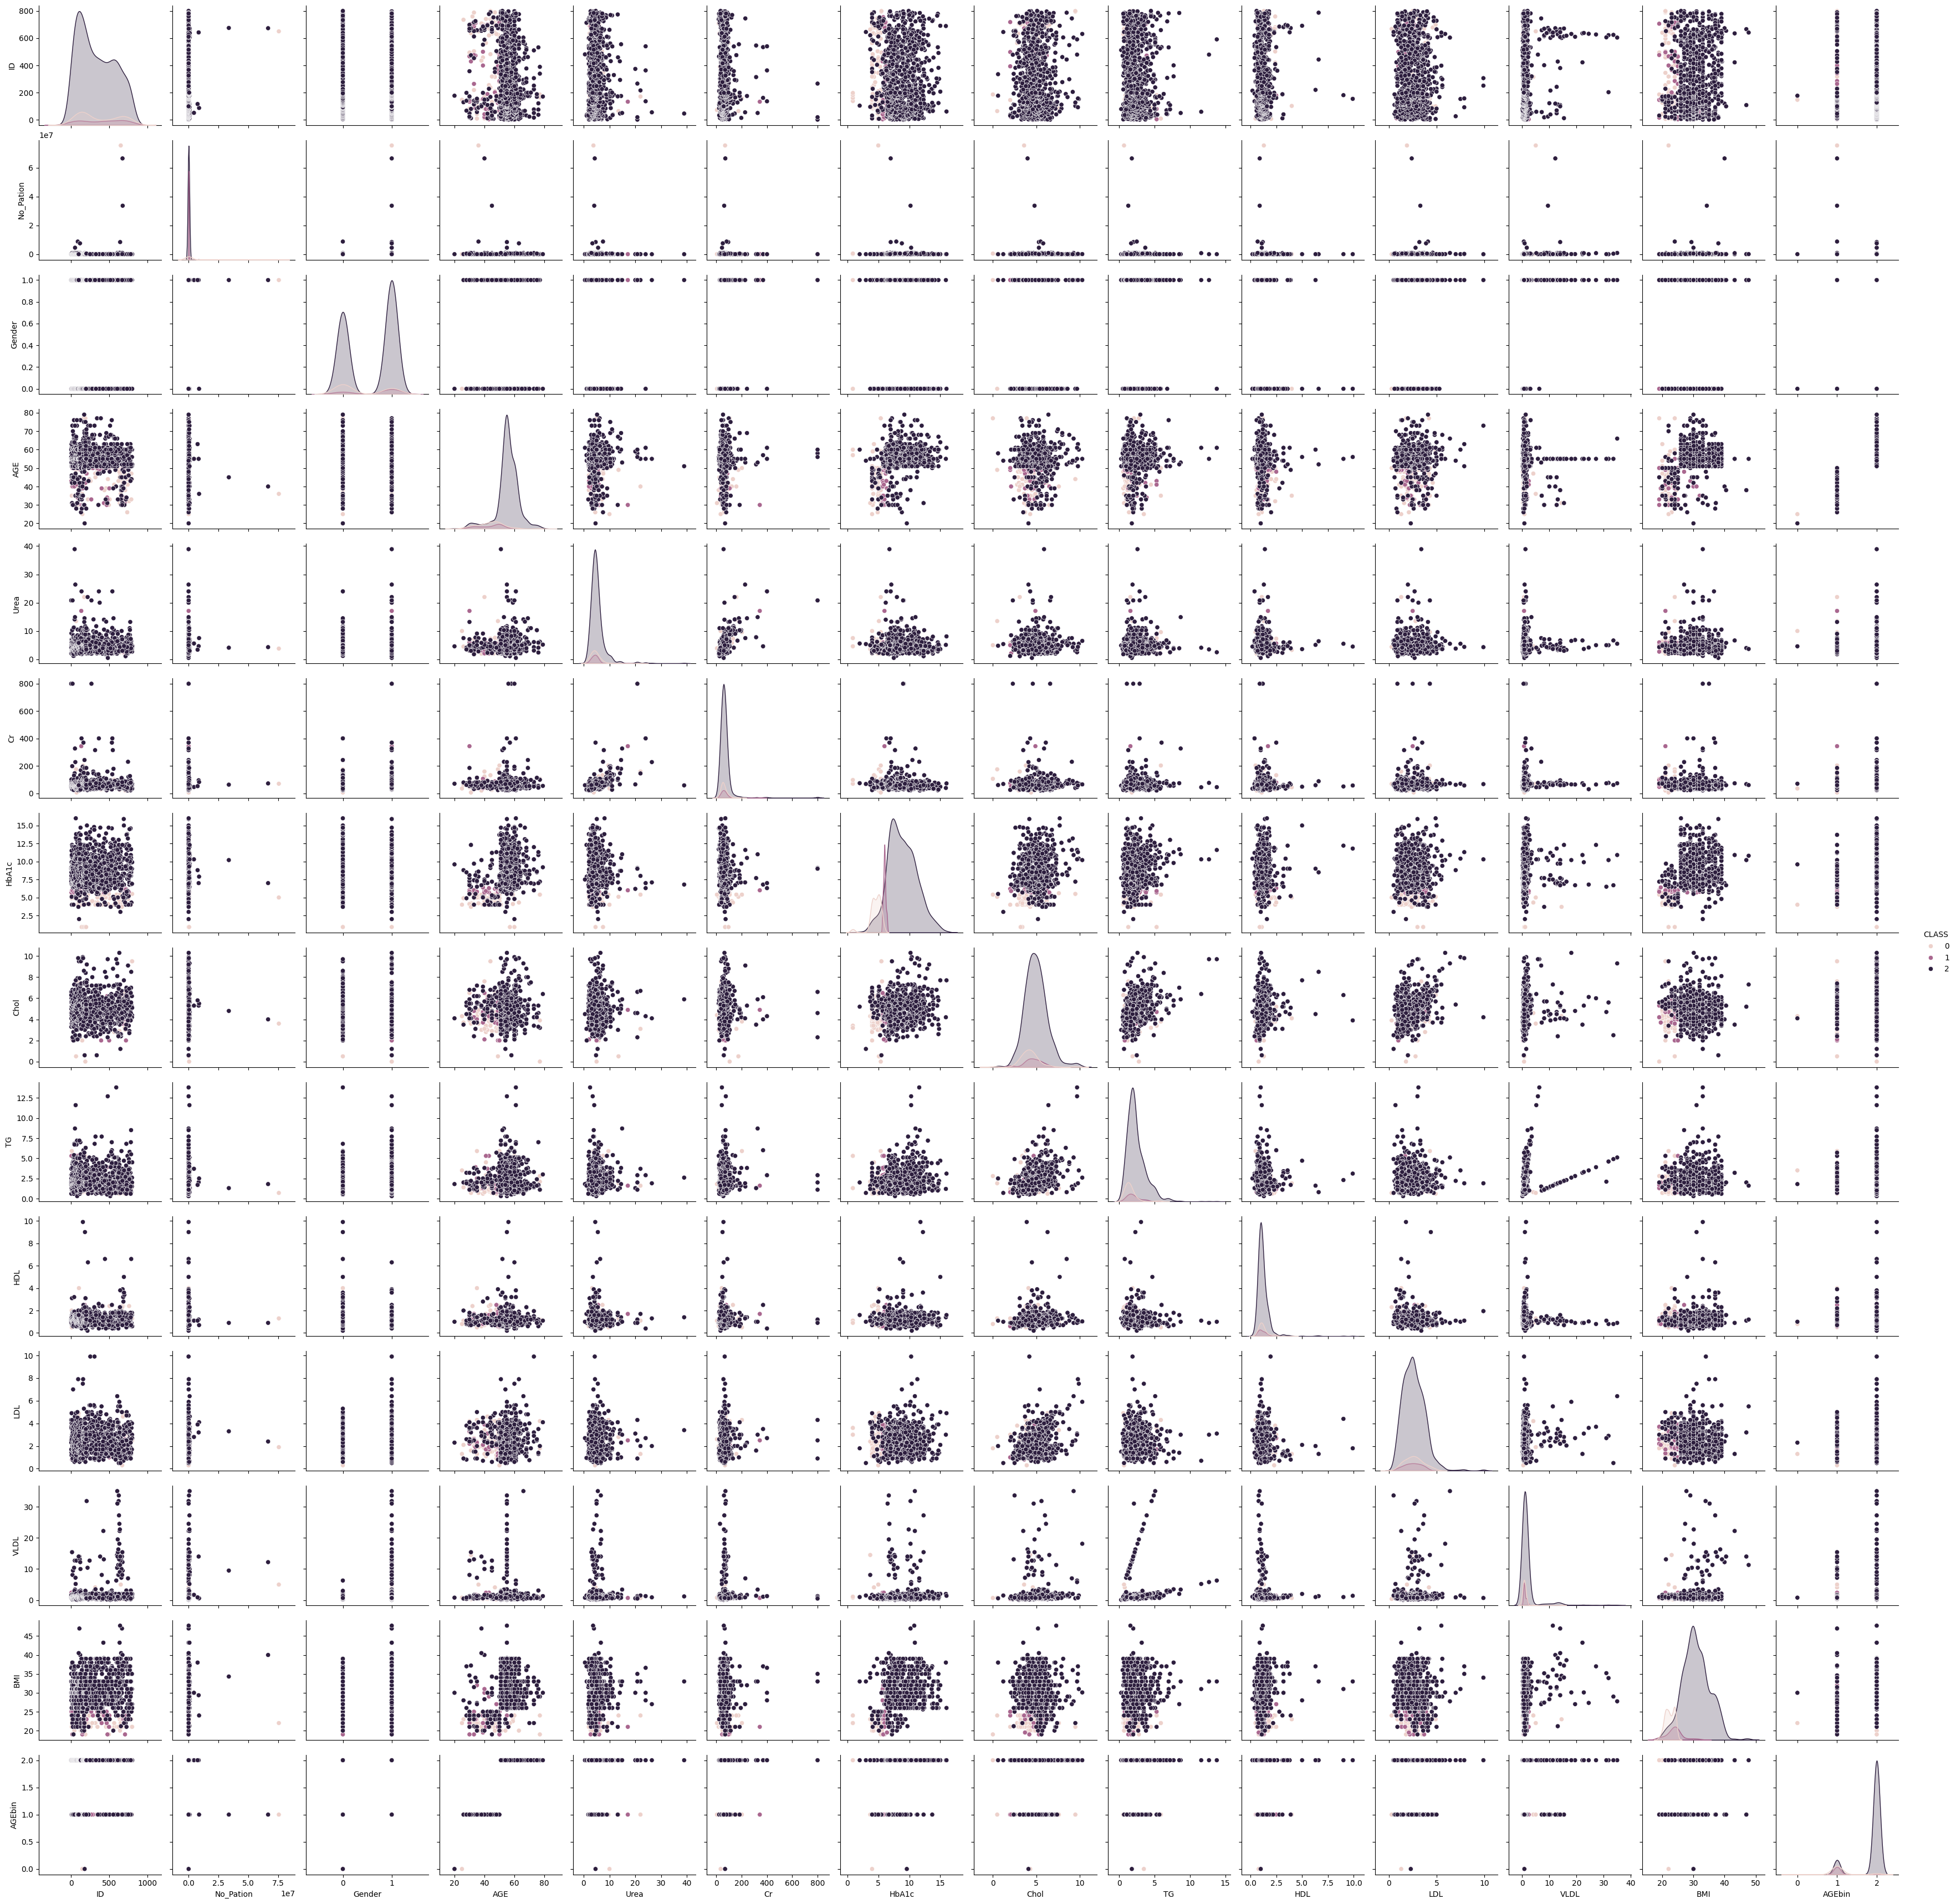

In [11]:
print(dataframe.columns)
print(dataframe.info())
print(dataframe.describe())
sns.heatmap(dataframe.corr(),annot=True,cmap="coolwarm")
sns.pairplot(dataframe,hue="CLASS")
plt.show()


DATA PREPROCESSING

In [15]:
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
scaler=MinMaxScaler()
poly=PolynomialFeatures()
X=dataframe.drop(columns=["CLASS"])
y=dataframe["CLASS"]
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)
print(x_train.shape,y_train.shape)
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train=poly.fit_transform(x_train)
x_test=poly.transform(x_test)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(750, 14) (750,)
(750, 120) (250, 120) (750,) (250,)


MODEL BUILDING

In [16]:
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier,RandomForestClassifier
svm_model=SVC()
hgbc=HistGradientBoostingClassifier(max_iter=1000)
rfc=RandomForestClassifier(n_jobs=-1,max_depth=10)
svm_model.fit(x_train,y_train)
hgbc.fit(x_train,y_train)
rfc.fit(x_train,y_train)


RandomForestClassifier(max_depth=10, n_jobs=-1)

C:\Users\yenug\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yenug\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yenug\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


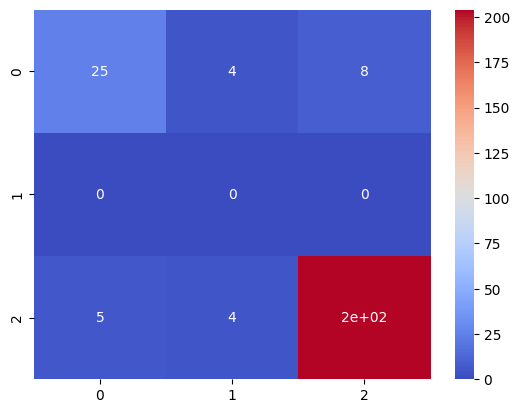

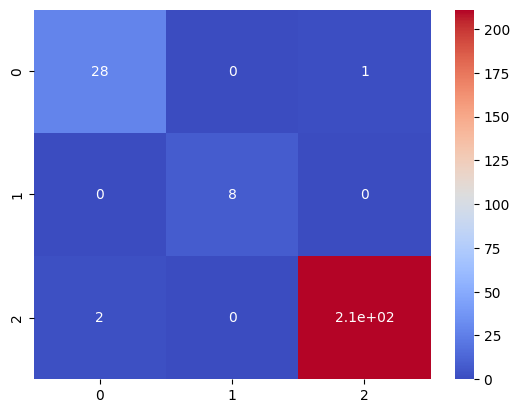

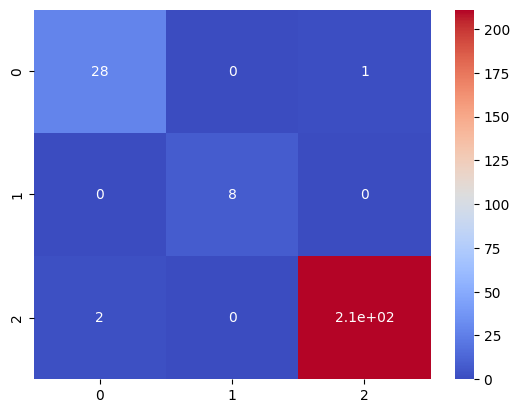

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        37
           1       0.00      0.00      0.00         0
           2       0.96      0.96      0.96       213

    accuracy                           0.92       250
   macro avg       0.60      0.54      0.57       250
weighted avg       0.94      0.92      0.93       250

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       1.00      1.00      1.00         8
           2       1.00      0.99      0.99       213

    accuracy                           0.99       250
   macro avg       0.98      0.99      0.98       250
weighted avg       0.99      0.99      0.99       250

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       1.00      1.00      1.00         8
           2       1.00      0.99      0.99       213

    accuracy        

In [17]:
y_preds1=svm_model.predict(x_test)
y_preds2=hgbc.predict(x_test)
y_preds3=rfc.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

acc1=accuracy_score(y_preds1,y_test)
acc2=accuracy_score(y_preds2,y_test)
acc3=accuracy_score(y_preds3,y_test)
matrix1=confusion_matrix(y_preds1,y_test)
matrix2=confusion_matrix(y_preds2,y_test)
matrix3=confusion_matrix(y_preds3,y_test)
report1=classification_report(y_preds1,y_test)
report2=classification_report(y_preds2,y_test)
report3=classification_report(y_preds3,y_test)


sns.heatmap(matrix1,annot=True,cmap="coolwarm")
plt.show()

sns.heatmap(matrix2,annot=True,cmap="coolwarm")
plt.show()
sns.heatmap(matrix3,annot=True,cmap="coolwarm")
plt.show()
print(report1)
print(report2)
print(report3)


In [18]:
dataframe_new=pd.DataFrame(
        [
                ["SVM",acc1*100],
                ["HistGradientBoostingClassifier",acc2*100],
                ["RandomForestClassifier",acc3*100]
        ],
        columns=["ML ALGORITHM","accuracy_score"]
)
print(dataframe_new)

                     ML ALGORITHM  accuracy_score
0                             SVM            91.6
1  HistGradientBoostingClassifier            98.8
2          RandomForestClassifier            98.8


In [ ]:
|